#### Import Libraries

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir(r'C:\Users\ganga\OneDrive\Desktop\Hackathon')
os.listdir()

['.jovianrc',
 'insurance.csv',
 'Life Expectancy Data.csv',
 'Life expectancy.ipynb']

#### Import data

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Exploratory Data Analysis

In [5]:
data.shape

(1338, 7)

In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
#data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#Explore categorical variables
cat_var = data.select_dtypes(include='object')
cat_var.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [9]:
#Summary of categorical variables
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1338 non-null   object
 1   smoker  1338 non-null   object
 2   region  1338 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB


In [10]:
# Number of unique values in each categorical variable
for i in cat_var.columns:
    print(i,data[i].nunique(), '\n')

sex 2 

smoker 2 

region 4 



In [11]:
#Frequency of each category in categorical variables
for i in cat_var.columns:
    print(i, '\n', data[i].value_counts(), '\n')

sex 
 male      676
female    662
Name: sex, dtype: int64 

smoker 
 no     1064
yes     274
Name: smoker, dtype: int64 

region 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 



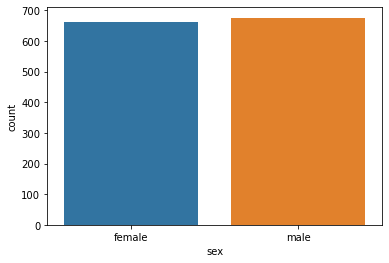

In [12]:
#Visualize gender variable
sns.countplot(data = data, x = 'sex')
plt.show()

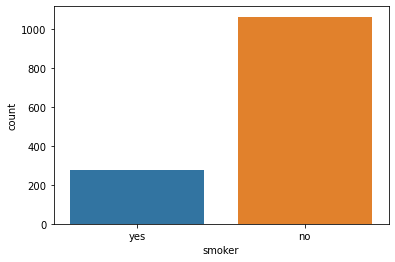

In [13]:
#Visualize smoker variable
sns.countplot(data = data, x = 'smoker')
plt.show()

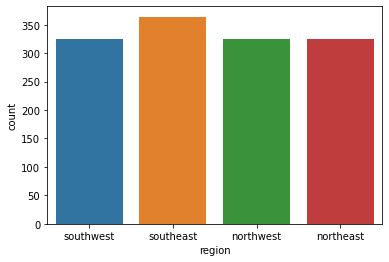

In [14]:
#Visualize region variable
sns.countplot(data = data, x = 'region')
plt.show()

In [15]:
#Null values in categorcal variables
cat_var.isnull().sum()

sex       0
smoker    0
region    0
dtype: int64

In [16]:
#Exploring numerical variables
num_var = data.select_dtypes(include='number')
num_var.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [17]:
#Summary of numerical variables
num_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [18]:
#Null values
num_var.isnull().sum()

age         0
bmi         0
children    0
charges     0
dtype: int64

In [19]:
#Outliers
data.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
1%,18.000000,17.895150,0.000000,1252.972730
5%,18.000000,21.256000,0.000000,1757.753400
10%,19.000000,22.990000,0.000000,2346.533615
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515


In [20]:
# capping outliers
data['charges'] = np.where(data['charges']>50000, 50000, data['charges'])

In [21]:
data.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13230.155774
std,14.049960,6.098187,1.205493,11969.723603
min,18.000000,15.960000,0.000000,1121.873900
1%,18.000000,17.895150,0.000000,1252.972730
5%,18.000000,21.256000,0.000000,1757.753400
10%,19.000000,22.990000,0.000000,2346.533615
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515


#### Feature Engineering

In [22]:
#Encoding categorical variables
from category_encoders import OneHotEncoder
enc = OneHotEncoder()
data = enc.fit_transform(data)

In [23]:
data.head()

,age,sex_1,sex_2,bmi,children,smoker_1,smoker_2,region_1,region_2,region_3,region_4,charges
0,19,1,0,27.900,0,1,0,1,0,0,0,16884.92400
1,18,0,1,33.770,1,0,1,0,1,0,0,1725.55230
2,28,0,1,33.000,3,0,1,0,1,0,0,4449.46200
3,33,0,1,22.705,0,0,1,0,0,1,0,21984.47061
4,32,0,1,28.880,0,0,1,0,0,1,0,3866.85520


#### Declare dependent and independent variables

In [24]:
X = data.drop('charges', axis = True)
y = data['charges']

#### Split data into train and test data

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
print(X_train.shape, X_test.shape)

(896, 11) (442, 11)


In [27]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [28]:
pd.DataFrame(scaled_x_train, columns=data.columns[:-1]).head()

,age,sex_1,sex_2,bmi,children,smoker_1,smoker_2,region_1,region_2,region_3,region_4
0,0.265106,1.024863,-1.024863,-0.913375,-0.912607,-0.515303,0.515303,-0.555004,-0.585942,-0.580787,1.701662
1,-0.016500,-0.975741,0.975741,0.795456,0.747689,1.940607,-1.940607,1.801790,-0.585942,-0.580787,-0.587661
2,0.405909,1.024863,-1.024863,-0.007962,-0.082459,1.940607,-1.940607,-0.555004,-0.585942,1.721802,-0.587661
3,-1.424533,1.024863,-1.024863,0.394165,-0.912607,-0.515303,0.515303,1.801790,-0.585942,-0.580787,-0.587661
4,1.461934,-0.975741,0.975741,1.564598,-0.912607,1.940607,-1.940607,1.801790,-0.585942,-0.580787,-0.587661


In [29]:
pd.DataFrame(scaled_x_test, columns=data.columns[:-1]).head()

,age,sex_1,sex_2,bmi,children,smoker_1,smoker_2,region_1,region_2,region_3,region_4
0,0.405909,1.024863,-1.024863,-0.897490,0.747689,-0.515303,0.515303,-0.555004,-0.585942,-0.580787,1.701662
1,-0.227705,1.024863,-1.024863,-0.087384,-0.912607,-0.515303,0.515303,-0.555004,-0.585942,1.721802,-0.587661
2,1.743540,1.024863,-1.024863,-0.611570,-0.912607,1.940607,-1.940607,-0.555004,-0.585942,1.721802,-0.587661
3,0.476311,-0.975741,0.975741,-0.802184,1.577838,-0.515303,0.515303,-0.555004,-0.585942,1.721802,-0.587661
4,-1.424533,-0.975741,0.975741,0.230305,-0.912607,1.940607,-1.940607,-0.555004,-0.585942,1.721802,-0.587661


#### Create model

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(scaled_x_train, y_train)

LinearRegression()

#### Predictions

In [31]:
y_predicts = reg.predict(scaled_x_test)
y_predicts

array([ 8865.34517697,  7044.68946067, 36754.25583551,  9427.62656053,
       26850.76552187, 11011.25816384,    44.44089675, 17145.26298194,
         977.23865632, 11217.68964162, 27877.92500748,  9403.84828568,
        4943.22884963, 38087.04729519, 40110.18738042, 36801.5813537 ,
       15016.10106583, 35529.03798547,  8847.38649226, 31280.300099  ,
        3677.17252722, 10210.45576038,  2443.66492154,  7120.10449185,
       11180.30265508, 13022.49278465, 14636.77396137,  5965.45863006,
        9874.44981301,  1988.23203257,  8953.71982007, 13136.494187  ,
        4286.35679319,  3170.43183932,  4510.28963258, 13218.33068423,
        1871.75050651,  8804.41593452, 33062.14070285, 32275.18216456,
        3619.04729963,  4332.47636742, 14212.61699496, 11582.03399455,
        8576.28009926, 12256.47355237,  5128.20354228,  2953.36614766,
       35121.18849109,  8958.6193101 , 15723.75527753,  2103.55434599,
       12368.44408502,  1497.74261894, 13361.94630404, 12645.45016511,
      

In [32]:
# Slope(m) value(s)
reg.coef_

array([ 3702.53614133,   -25.72757573,    25.72757573,  2047.18400361,
         456.41513983,  4781.13293962, -4781.13293962,  -115.62339244,
        -164.99692266,    56.56303463,   220.83755047])

In [33]:
# Interchept(C) value
reg.intercept_

13334.92693622768

In [34]:
#Number of features considered
reg.n_features_in_

11

In [35]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

#### Model Evaluation

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

score = r2_score(y_test, y_predicts)
print('R Squared value :', score)

mae = mean_absolute_error(y_test, y_predicts)
print('Mean Absolute Error :', mae)

mse = mean_squared_error(y_test, y_predicts)
print('Mean Squared Error :', mse)

R Squared value : 0.7629364678436203
Mean Absolute Error : 4159.544857087318
Mean Squared Error : 34092642.87049621


In [37]:
#Cross validation
from sklearn.model_selection import cross_val_score, KFold
k_folds = KFold(n_splits=10, shuffle=True, random_state=1)

cv_score = cross_val_score(reg, scaled_x_train, y_train, cv=k_folds, scoring='r2')
cv_score

array([0.68661061, 0.81571   , 0.7945542 , 0.67014673, 0.76236376,
       0.7761038 , 0.74954802, 0.66348858, 0.76453991, 0.64578839])

In [38]:
cv_score.mean()

0.7328854007338055

In [39]:
#Ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge, param_grid = params, scoring='neg_mean_squared_error', cv=10, verbose=0, return_train_score=True)

ridge_model = ridge_regressor.fit(scaled_x_train, y_train)
ridge_model

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
#predictions
y_predicts_02 = ridge_model.predict(scaled_x_test)
y_predicts_02

array([ 8.88566008e+03,  7.07443990e+03,  3.65773162e+04,  9.44721203e+03,
        2.67902922e+04,  1.10170950e+04,  1.50435177e+02,  1.70695477e+04,
        1.07553164e+03,  1.12180022e+04,  2.78246640e+04,  9.42072469e+03,
        5.01591829e+03,  3.79315543e+04,  3.99197832e+04,  3.66556156e+04,
        1.49836109e+04,  3.53875081e+04,  8.87630464e+03,  3.11642606e+04,
        3.77658152e+03,  1.02269857e+04,  2.53806323e+03,  7.15496618e+03,
        1.11757193e+04,  1.29901339e+04,  1.45913563e+04,  6.01938986e+03,
        9.88384881e+03,  2.09507430e+03,  8.98638482e+03,  1.30988644e+04,
        4.36347549e+03,  3.25317971e+03,  4.58563896e+03,  1.31905346e+04,
        1.97048190e+03,  8.82678186e+03,  3.29297069e+04,  3.21747285e+04,
        3.71494045e+03,  4.40190936e+03,  1.41761012e+04,  1.15654976e+04,
        8.61911179e+03,  1.22450980e+04,  5.18812374e+03,  3.04766675e+03,
        3.49973004e+04,  8.99777312e+03,  1.56739400e+04,  2.21297600e+03,
        1.23454823e+04,  

In [41]:
pd.DataFrame(ridge_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000801,0.002402,0.000947,0.002394,0.0,{'alpha': 1e-15},-3.844233e+07,-2.510976e+07,-3.684477e+07,-3.800051e+07,...,-3.531773e+07,-3.521239e+07,-3.559439e+07,-3.463039e+07,-3.509000e+07,-3.522307e+07,-3.556776e+07,-3.555028e+07,-3.539378e+07,490578.182432
1,0.000050,0.000150,0.000800,0.002401,0.0,{'alpha': 1e-10},-3.844233e+07,-2.510976e+07,-3.684477e+07,-3.800051e+07,...,-3.531773e+07,-3.521239e+07,-3.559439e+07,-3.463039e+07,-3.509000e+07,-3.522307e+07,-3.556776e+07,-3.555028e+07,-3.539378e+07,490578.182432
2,0.000772,0.002317,0.000000,0.000000,0.0,{'alpha': 1e-08},-3.844233e+07,-2.510976e+07,-3.684477e+07,-3.800051e+07,...,-3.531773e+07,-3.521239e+07,-3.559439e+07,-3.463039e+07,-3.509000e+07,-3.522307e+07,-3.556776e+07,-3.555028e+07,-3.539378e+07,490578.182432
3,0.001618,0.004855,0.000000,0.000000,0.001,{'alpha': 0.001},-3.844234e+07,-2.510978e+07,-3.684477e+07,-3.800051e+07,...,-3.531773e+07,-3.521239e+07,-3.559439e+07,-3.463039e+07,-3.509000e+07,-3.522307e+07,-3.556776e+07,-3.555028e+07,-3.539378e+07,490578.182432
4,0.000000,0.000000,0.000000,0.000000,0.01,{'alpha': 0.01},-3.844243e+07,-2.510993e+07,-3.684483e+07,-3.800058e+07,...,-3.531773e+07,-3.521239e+07,-3.559439e+07,-3.463039e+07,-3.509000e+07,-3.522307e+07,-3.556776e+07,-3.555028e+07,-3.539378e+07,490578.182432
5,0.000000,0.000000,0.000000,0.000000,1,{'alpha': 1},-3.845323e+07,-2.512667e+07,-3.685116e+07,-3.800842e+07,...,-3.531779e+07,-3.521245e+07,-3.559446e+07,-3.463045e+07,-3.509007e+07,-3.522313e+07,-3.556782e+07,-3.555034e+07,-3.539384e+07,490578.183367
6,0.001563,0.004688,0.000000,0.000000,5,{'alpha': 5},-3.849786e+07,-2.519570e+07,-3.687782e+07,-3.804145e+07,...,-3.531931e+07,-3.521399e+07,-3.559601e+07,-3.463203e+07,-3.509160e+07,-3.522468e+07,-3.556937e+07,-3.555186e+07,-3.539538e+07,490578.079962
7,0.001295,0.003715,0.000000,0.000000,10,{'alpha': 10},-3.855589e+07,-2.528515e+07,-3.691360e+07,-3.808571e+07,...,-3.532398e+07,-3.521875e+07,-3.560080e+07,-3.463690e+07,-3.509635e+07,-3.522947e+07,-3.557414e+07,-3.555656e+07,-3.540013e+07,490577.163658
8,0.001608,0.003216,0.000000,0.000000,20,{'alpha': 20},-3.867915e+07,-2.547412e+07,-3.699305e+07,-3.818383e+07,...,-3.534228e+07,-3.523737e+07,-3.561958e+07,-3.465597e+07,-3.511494e+07,-3.524820e+07,-3.559282e+07,-3.557497e+07,-3.541875e+07,490569.494440
9,0.000050,0.000150,0.000067,0.000200,30,{'alpha': 30},-3.881157e+07,-2.567582e+07,-3.708261e+07,-3.829409e+07,...,-3.537203e+07,-3.526760e+07,-3.565009e+07,-3.468695e+07,-3.514515e+07,-3.527860e+07,-3.562315e+07,-3.560486e+07,-3.544899e+07,490548.981225


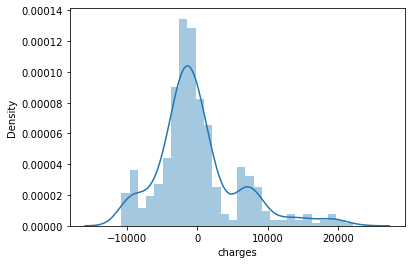

In [42]:
sns.distplot(y_test-y_predicts_02, )
plt.show()

In [43]:
#Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

score = r2_score(y_test, y_predicts_02)
print('R Squared value :', score)

mae = mean_absolute_error(y_test, y_predicts_02)
print('Mean Absolute Error :', mae)

mse = mean_squared_error(y_test, y_predicts_02)
print('Mean Squared Error :', mse)

R Squared value : 0.762922562583684
Mean Absolute Error : 4164.241239814844
Mean Squared Error : 34094642.61738567


In [44]:
ridge_model.best_params_

{'alpha': 10}

In [45]:
ridge_model.best_score_

-36236837.33231743

In [46]:
ridge_model.best_index_

7

In [47]:
ridge_model.n_features_in_

11

In [48]:
#Lasso regression
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10,
                              verbose=1, return_train_score=True)
lasso_model = lasso_regressor.fit(scaled_x_train, y_train)
lasso_model

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [49]:
#Predictions
y_predicts_03 = lasso_model.predict(scaled_x_test)
y_predicts_03

array([ 8799.67485475,  7063.8368275 , 36429.60977203,  9181.54077289,
       26562.54796712, 10941.23019105,   344.73437138, 16707.12951695,
        1340.59884911, 10882.62634143, 27884.73459753,  9138.48063813,
        5365.61274379, 37601.9216826 , 39786.36959442, 36462.79571531,
       14934.90953511, 35418.62991082,  9208.32400939, 31077.76583845,
        3843.67251855, 10268.95020465,  2833.80725135,  6971.47268349,
       10956.21093607, 12860.84948336, 14777.28759592,  5819.72804619,
        9762.53706821,  2427.60578914,  9074.10158807, 12989.68696327,
        4696.33738035,  3261.08337735,  4800.11670796, 12833.01603931,
        2381.03583771,  9100.76089941, 32804.86357815, 32160.53025239,
        3809.21644037,  4228.45787951, 14290.0601041 , 11475.25925144,
        8653.51195148, 12415.13473428,  5008.23370359,  3351.74597053,
       34808.47528052,  8983.35622664, 15854.77808358,  2492.30394666,
       12018.10307093,  1601.71104339, 13476.15332006, 12279.31566092,
      

In [50]:
lasso_model.best_score_

-36162274.59883115

In [51]:
#Evaluation

score = r2_score(y_test, y_predicts_03)
print('R Squared value :', score)

mae = mean_absolute_error(y_test, y_predicts_03)
print('Mean Absolute Error :', mae)

mse = mean_squared_error(y_test, y_predicts_03)
print('Mean Squared Error :', mse)

R Squared value : 0.7619190030333813
Mean Absolute Error : 4163.65263376811
Mean Squared Error : 34238966.78667702


In [52]:
results = pd.DataFrame(lasso_model.cv_results_)

In [53]:
lasso_model.best_estimator_

Lasso(alpha=100)

In [54]:
lasso_model.best_params_

{'alpha': 100}

In [55]:
lasso_model.best_score_

-36162274.59883115

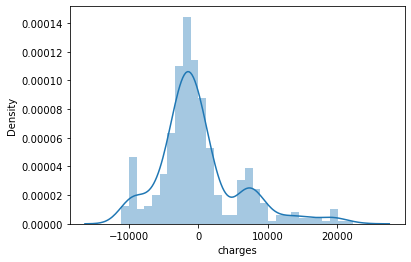

In [56]:
sns.distplot(y_test-y_predicts_03)
plt.show()

In [57]:
#Hyper parameter tuning

from sklearn.feature_selection import RFE

k_folds = KFold(n_splits=10, shuffle=True, random_state=1)

l_r = LinearRegression()
l_r.fit(scaled_x_train, y_train)

model = RFE(l_r)

parameters = [{'n_features_to_select':list(range(12))}]

final_model = GridSearchCV(model, param_grid=parameters, scoring='r2',
                          verbose=1, return_train_score=True, cv=k_folds)
final_model.fit(scaled_x_train, y_train)
final_model

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11]}],
             return_train_score=True, scoring='r2', verbose=1)

In [58]:
y_predicts_04 = final_model.predict(scaled_x_test)

In [59]:
#Evaluation

score = r2_score(y_test, y_predicts_04)
print('R Squared value :', score)

mae = mean_absolute_error(y_test, y_predicts_04)
print('Mean Absolute Error :', mae)

mse = mean_squared_error(y_test, y_predicts_04)
print('Mean Squared Error :', mse)

R Squared value : 0.7614270012051036
Mean Absolute Error : 4177.755693184493
Mean Squared Error : 34309722.682662055


In [60]:
results = pd.DataFrame(final_model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006910,0.007820,0.000000,0.000000,0,{'n_features_to_select': 0},NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.006433,0.007880,0.000000,0.000000,1,{'n_features_to_select': 1},0.568745,0.717744,0.646637,0.516389,...,0.610132,0.622879,0.619154,0.608809,0.606076,0.630596,0.608623,0.623291,0.613736,0.010776
2,0.006261,0.007135,0.000000,0.000000,2,{'n_features_to_select': 2},0.568745,0.717744,0.646637,0.516389,...,0.610132,0.622879,0.619154,0.608809,0.606076,0.630596,0.608623,0.623291,0.613736,0.010776
3,0.003765,0.005160,0.000000,0.000000,3,{'n_features_to_select': 3},0.690412,0.769285,0.765864,0.632217,...,0.718458,0.731768,0.720922,0.715696,0.723118,0.733470,0.721143,0.729941,0.723191,0.006714
4,0.001573,0.004719,0.003180,0.006361,4,{'n_features_to_select': 4},0.694755,0.811139,0.790680,0.665966,...,0.745051,0.757480,0.747841,0.746049,0.746819,0.757164,0.747785,0.758096,0.749483,0.006685
5,0.001645,0.004934,0.001577,0.004730,5,{'n_features_to_select': 5},0.695410,0.814733,0.792999,0.672080,...,0.746466,0.758463,0.749817,0.747408,0.748983,0.758915,0.748923,0.758422,0.750957,0.006667
6,0.003193,0.006387,0.000000,0.000000,6,{'n_features_to_select': 6},0.690143,0.815476,0.793044,0.669030,...,0.746633,0.759041,0.750004,0.748416,0.749870,0.759943,0.749566,0.758944,0.751533,0.006792
7,0.004715,0.007202,0.000000,0.000000,7,{'n_features_to_select': 7},0.687827,0.815373,0.795517,0.670962,...,0.746929,0.759231,0.750272,0.748655,0.748131,0.760059,0.749946,0.759065,0.751647,0.006810
8,0.003155,0.006310,0.000000,0.000000,8,{'n_features_to_select': 8},0.688161,0.815761,0.793919,0.670880,...,0.747057,0.759262,0.750325,0.748673,0.749592,0.760096,0.750072,0.759065,0.751845,0.006746
9,0.000000,0.000000,0.001579,0.004736,9,{'n_features_to_select': 9},0.686505,0.815761,0.794554,0.670880,...,0.747074,0.759262,0.750325,0.748681,0.750131,0.760114,0.750178,0.759089,0.751928,0.006739


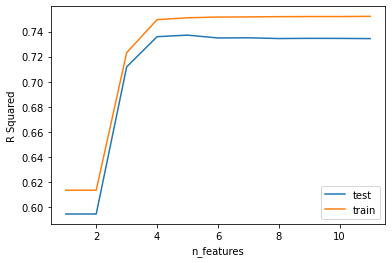

In [61]:
plt.plot(results['param_n_features_to_select'], results['mean_test_score'])
plt.plot(results['param_n_features_to_select'], results['mean_train_score'])
plt.xlabel('n_features')
plt.ylabel('R Squared')
plt.legend(['test', 'train'], loc = 'lower right')
plt.show()

In [62]:
final_model.get_params()

{'cv': KFold(n_splits=10, random_state=1, shuffle=True),
 'error_score': nan,
 'estimator__estimator__copy_X': True,
 'estimator__estimator__fit_intercept': True,
 'estimator__estimator__n_jobs': None,
 'estimator__estimator__normalize': 'deprecated',
 'estimator__estimator__positive': False,
 'estimator__estimator': LinearRegression(),
 'estimator__importance_getter': 'auto',
 'estimator__n_features_to_select': None,
 'estimator__step': 1,
 'estimator__verbose': 0,
 'estimator': RFE(estimator=LinearRegression()),
 'n_jobs': None,
 'param_grid': [{'n_features_to_select': [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11]}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': True,
 'scoring': 'r2',
 'verbose': 1}

In [63]:
#Final model
reg = LinearRegression()
reg.fit(scaled_x_train, y_train)

model = RFE(reg, n_features_to_select=6)
final_model = model.fit(scaled_x_train, y_train)

In [64]:
y_predicts_05 = final_model.predict(scaled_x_test)

In [65]:
#Evaluation

score = r2_score(y_test, y_predicts_05)
print('R Squared value :', score)

mae = mean_absolute_error(y_test, y_predicts_05)
print('Mean Absolute Error :', mae)

mse = mean_squared_error(y_test, y_predicts_05)
print('Mean Squared Error :', mse)

R Squared value : 0.7620989912853301
Mean Absolute Error : 4163.032247481061
Mean Squared Error : 34213082.26897513
